In [1]:
import numpy as np
import pandas as pd

Series

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
print(data.values, data.index)
print(type(data.values), type(data.index))

[0.25 0.5  0.75 1.  ] RangeIndex(start=0, stop=4, step=1)
<class 'numpy.ndarray'> <class 'pandas.core.indexes.range.RangeIndex'>


In [4]:
print(data[1])
print(data[1:3])

0.5
1    0.50
2    0.75
dtype: float64


In [5]:
print(type(data[1]))
print(type(data[1:3]))

<class 'numpy.float64'>
<class 'pandas.core.series.Series'>


In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict) # sorted keys
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [9]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

In [10]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [11]:
ser1 = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
ser1

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [12]:
'a' in ser1

True

In [13]:
ser1.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
list(ser1.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [15]:
ser1['e'] = 1.25
ser1

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [16]:
ser1['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [17]:
ser1[0:2] # slicing by implicit integer index

a    0.25
b    0.50
dtype: float64

In [18]:
ser1[(ser1 > 0.3) & (ser1 < 0.8)]

b    0.50
c    0.75
dtype: float64

In [19]:
ser1[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [20]:
ser2 = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print(ser2)
print(ser2[1]) # explicit index when indexing
print(ser2[1:3]) # implicit index when slicing
# confusing, use indexers loc and iloc instead

1    a
3    b
5    c
dtype: object
a
3    b
5    c
dtype: object


In [21]:
# the loc attribute allows indexing and slicing that always references the explicit index
print(ser2.loc[1])
print(ser2.loc[1:3])

a
1    a
3    b
dtype: object


In [22]:
# The iloc attribute allows indexing and slicing that always references the implicit Python-style index
print(ser2.iloc[1])
print(ser2.iloc[1:3])

b
3    b
5    c
dtype: object


DataFrame

In [23]:
area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [24]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

area  population
California  423967    38332521
Florida     170312    19552860
Illinois    149995    12882135
New York    141297    19651127
Texas       695662    26448193

In [25]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [26]:
states.columns

Index(['area', 'population'], dtype='object')

In [27]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [28]:
pd.DataFrame(population, columns=['population'])

population
California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193

In [29]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

a  b
0  0  0
1  1  2
2  2  4

In [30]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

In [31]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

foo       bar
a  0.048071  0.344867
b  0.634463  0.124925
c  0.998668  0.269074

In [32]:
area = pd.Series({'California': 423967,
                  'Texas': 695662,
                  'New York': 141297,
                  'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521,
                 'Texas': 26448193,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

area       pop
California  423967  38332521
Florida     170312  19552860
Illinois    149995  12882135
New York    141297  19651127
Texas       695662  26448193

In [33]:
print(data['area'])
print(data.area)

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64
California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64


In [34]:
data.pop is data['pop'] # pop refers to the method here, not the column, conflict !
# use data['pop'] = z rather than data.pop = z

False

In [35]:
data['density'] = data['pop'] / data['area']
data

area       pop     density
California  423967  38332521   90.413926
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763
New York    141297  19651127  139.076746
Texas       695662  26448193   38.018740

In [36]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [37]:
data.T # transpose

California       Florida      Illinois      New York         Texas
area     4.239670e+05  1.703120e+05  1.499950e+05  1.412970e+05  6.956620e+05
pop      3.833252e+07  1.955286e+07  1.288214e+07  1.965113e+07  2.644819e+07
density  9.041393e+01  1.148061e+02  8.588376e+01  1.390767e+02  3.801874e+01

In [38]:
data.iloc[:3, :2]

area       pop
California  423967  38332521
Florida     170312  19552860
Illinois    149995  12882135

In [39]:
data.loc[:'Illinois', :'pop']

area       pop
California  423967  38332521
Florida     170312  19552860
Illinois    149995  12882135

In [40]:
data.loc[data.density > 100, ['pop', 'density']]

pop     density
Florida   19552860  114.806121
New York  19651127  139.076746

In [41]:
data.iloc[0, 2] = 90

In [42]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')

population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [43]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [44]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [45]:
rng = np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
df = pd.DataFrame(A, columns=list('QRST'))
df

Q  R  S  T
0  6  3  7  4
1  6  9  2  6
2  7  4  3  7

In [46]:
df - df.iloc[0] # subtract the first row from all rows

Q  R  S  T
0  0  0  0  0
1  0  6 -5  2
2  1  1 -4  3

In [47]:
df.subtract(df['R'], axis=0)

Q  R  S  T
0  3  0  4  1
1 -3  0 -7 -3
2  3  0 -1  3

In [48]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [49]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [50]:
1 + np.nan

nan

In [51]:
type(np.nan)

float

In [52]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [53]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [54]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [55]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [56]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [57]:
data.dropna()

0        1
2    hello
dtype: object

In [58]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [59]:
df.dropna() # By default, dropna() will drop all rows in which any null value is present

0    1  2
1  2.0  3.0  5

In [60]:
df.dropna(axis=1)

2
0  2
1  5
2  6

In [61]:
df[3] = np.nan
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [62]:
df.dropna(axis=1, how='all')

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [63]:
df.dropna(axis=0, thresh=3)

0    1  2   3
1  2.0  3.0  5 NaN

In [64]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [65]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [66]:
data.fillna(method='ffill') # forward-fill to propagate the previous value forward

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [67]:
data.fillna(method='bfill') # back-fill to propagate the next value backward

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [68]:
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [69]:
df.fillna(method='ffill', axis=1)

0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0

Index

In [70]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [71]:
print(ind[1], ind[1:3])

3 Int64Index([3, 5], dtype='int64')


In [72]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [73]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [74]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

MultiIndex

In [75]:
index = [('California', 2000),
         ('California', 2010),
         ('New York', 2000),
         ('New York', 2010),
         ('Texas', 2000),
         ('Texas', 2010)]
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [76]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [77]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [78]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [79]:
pop_df = pop.unstack() # MultiIndexed Series to DataFrame
pop_df

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [80]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [81]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [82]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

2000      2010
California  0.273594  0.249211
New York    0.247010  0.222831
Texas       0.283251  0.273568

In [83]:
df = pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=['data1', 'data2'])
df

data1     data2
a 1  0.884084  0.290523
  2  0.332472  0.054893
b 1  0.647131  0.196708
  2  0.651132  0.924942

In [84]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [85]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [86]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [87]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [88]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [89]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [90]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
data = np.round(np.random.randn(4, 6), 1)
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1     -0.1  0.2  -0.3  0.6 -1.5  0.4
     2     -2.1 -1.2  -1.2  1.6  0.5 -0.5
2014 1     -0.0  0.4   0.4 -0.5  2.1  1.2
     2      0.0  0.6   0.9  0.8  1.4  0.8

In [91]:
health_data['Guido']

type         HR  Temp
year visit           
2013 1     -0.3   0.6
     2     -1.2   1.6
2014 1      0.4  -0.5
     2      0.9   0.8

In [92]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [93]:
pop['California', 2000]

33871648

In [94]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [95]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [96]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [97]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [98]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [99]:
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1     -0.1  0.2  -0.3  0.6 -1.5  0.4
     2     -2.1 -1.2  -1.2  1.6  0.5 -0.5
2014 1     -0.0  0.4   0.4 -0.5  2.1  1.2
     2      0.0  0.6   0.9  0.8  1.4  0.8

In [100]:
health_data['Guido', 'HR']

year  visit
2013  1       -0.3
      2       -1.2
2014  1        0.4
      2        0.9
Name: (Guido, HR), dtype: float64

In [101]:
health_data.iloc[:2, :2]

subject     Bob     
type         HR Temp
year visit          
2013 1     -0.1  0.2
     2     -2.1 -1.2

In [102]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1       -0.1
      2       -2.1
2014  1       -0.0
      2        0.0
Name: (Bob, HR), dtype: float64

In [103]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.588938
      2      0.986428
c     1      0.015180
      2      0.629742
b     1      0.818419
      2      0.206845
dtype: float64

In [104]:
data = data.sort_index()
data

char  int
a     1      0.588938
      2      0.986428
b     1      0.818419
      2      0.206845
c     1      0.015180
      2      0.629742
dtype: float64

In [105]:
data['a':'b']

char  int
a     1      0.588938
      2      0.986428
b     1      0.818419
      2      0.206845
dtype: float64

In [106]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [107]:
pop.unstack(level=0)

state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561

In [108]:
pop.unstack(level=1)

year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [109]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [110]:
pop_flat = pop.reset_index(name='population') # index to columns,
pop_flat

state  year  population
0  California  2000    33871648
1  California  2010    37253956
2    New York  2000    18976457
3    New York  2010    19378102
4       Texas  2000    20851820
5       Texas  2010    25145561

In [111]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [112]:
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1     -0.1  0.2  -0.3  0.6 -1.5  0.4
     2     -2.1 -1.2  -1.2  1.6  0.5 -0.5
2014 1     -0.0  0.4   0.4 -0.5  2.1  1.2
     2      0.0  0.6   0.9  0.8  1.4  0.8

In [113]:
data_mean = health_data.mean(level='year')
data_mean

subject  Bob      Guido         Sue      
type      HR Temp    HR  Temp    HR  Temp
year                                     
2013    -1.1 -0.5 -0.75  1.10 -0.50 -0.05
2014     0.0  0.5  0.65  0.15  1.75  1.00

In [114]:
data_mean.mean(axis=1, level='type')

type        HR      Temp
year                    
2013 -0.783333  0.183333
2014  0.800000  0.550000

Combining Datasets

In [115]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2

In [116]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [117]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2], axis=0))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [118]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [119]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [0, 1]


In [120]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [121]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [122]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [123]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [124]:
print(df5); print(df6);
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [126]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


pd.merge(): one-to-one join

In [127]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [128]:
df3 = pd.merge(df1, df2)
df3

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

pd.merge(): many-to-one join

In [129]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


pd.merge(): many-to-many join

In [130]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


Specification of the Merge key:

In [131]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [132]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [133]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000

In [134]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [135]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [137]:
# For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [138]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


Specifying Set Arithmetic for Joins

In [139]:
# By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join.
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']}, columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [140]:
pd.merge(df6, df7, how='inner')

name   food drink
0  Mary  bread  wine

In [141]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer')) # union

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [142]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [144]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [145]:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


Grouping = split + apply function + combine

In [146]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])
df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

In [148]:
df.groupby('key').sum()

data
key      
A       3
B       5
C       7

In [149]:
df.groupby('key')['data'].sum()

key
A    3
B    5
C    7
Name: data, dtype: int64

In [150]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [151]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [152]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

In [153]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [154]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

data1  data2
key              
A        0      5
B        1      7
C        2      9

In [155]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [156]:
df.groupby('key').transform(lambda x: x - x.mean())

data1  data2
0   -1.5    1.0
1   -1.5   -3.5
2   -1.5   -3.0
3    1.5   -1.0
4    1.5    3.5
5    1.5    3.0

In [157]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [158]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [159]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


Pivot Tables - Multidimensional Aggregation

In [161]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [164]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [166]:
titanic.pivot_table('survived', index='sex', columns='class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [167]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [168]:
pd.cut(titanic['age'], [0, 18, 80])

0      (18, 80]
1      (18, 80]
2      (18, 80]
3      (18, 80]
4      (18, 80]
5           NaN
6      (18, 80]
7       (0, 18]
8      (18, 80]
9       (0, 18]
10      (0, 18]
11     (18, 80]
12     (18, 80]
13     (18, 80]
14      (0, 18]
15     (18, 80]
16      (0, 18]
17          NaN
18     (18, 80]
19          NaN
20     (18, 80]
21     (18, 80]
22      (0, 18]
23     (18, 80]
24      (0, 18]
25     (18, 80]
26          NaN
27     (18, 80]
28          NaN
29          NaN
         ...   
861    (18, 80]
862    (18, 80]
863         NaN
864    (18, 80]
865    (18, 80]
866    (18, 80]
867    (18, 80]
868         NaN
869     (0, 18]
870    (18, 80]
871    (18, 80]
872    (18, 80]
873    (18, 80]
874    (18, 80]
875     (0, 18]
876    (18, 80]
877    (18, 80]
878         NaN
879    (18, 80]
880    (18, 80]
881    (18, 80]
882    (18, 80]
883    (18, 80]
884    (18, 80]
885    (18, 80]
886    (18, 80]
887    (18, 80]
888         NaN
889    (18, 80]
890    (18, 80]
Name: age, Length: 891, 

In [169]:
# Quantile-based discretization function.
# Each of any set of values of a variate which divide a frequency distribution into equal groups,
# each containing the same fraction of the total population.
fare = pd.qcut(titanic['fare'], 2)
print(fare)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
5       (-0.001, 14.454]
6      (14.454, 512.329]
7      (14.454, 512.329]
8       (-0.001, 14.454]
9      (14.454, 512.329]
10     (14.454, 512.329]
11     (14.454, 512.329]
12      (-0.001, 14.454]
13     (14.454, 512.329]
14      (-0.001, 14.454]
15     (14.454, 512.329]
16     (14.454, 512.329]
17      (-0.001, 14.454]
18     (14.454, 512.329]
19      (-0.001, 14.454]
20     (14.454, 512.329]
21      (-0.001, 14.454]
22      (-0.001, 14.454]
23     (14.454, 512.329]
24     (14.454, 512.329]
25     (14.454, 512.329]
26      (-0.001, 14.454]
27     (14.454, 512.329]
28      (-0.001, 14.454]
29      (-0.001, 14.454]
             ...        
861     (-0.001, 14.454]
862    (14.454, 512.329]
863    (14.454, 512.329]
864     (-0.001, 14.454]
865     (-0.001, 14.454]
866     (-0.001, 14.454]
867    (14.454, 512.329]
868     (-0.001, 14.454]
869     (-0.001, 14.454]


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Vectorized string operations

In [171]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [172]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [173]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [174]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

Time Series

In [175]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [176]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [177]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [178]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [179]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [180]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [181]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [182]:
date.day

4

In [183]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [184]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [185]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [186]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [187]:
# Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [188]:
dates.to_period('D') # frequency day

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [189]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [190]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [191]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [192]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [193]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [194]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [195]:
pd.timedelta_range(0, periods=9, freq="2H30T") # frequency of 2 hours 30 minutes

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Time Series - Resampling, Shifting, and Windowing

One common need for time series data is resampling at a higher or lower frequency.

In [205]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [208]:
# resample function is aggregation style
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

Time Shifting

In [212]:
# shift() shifts the data, tshift() shifts the index

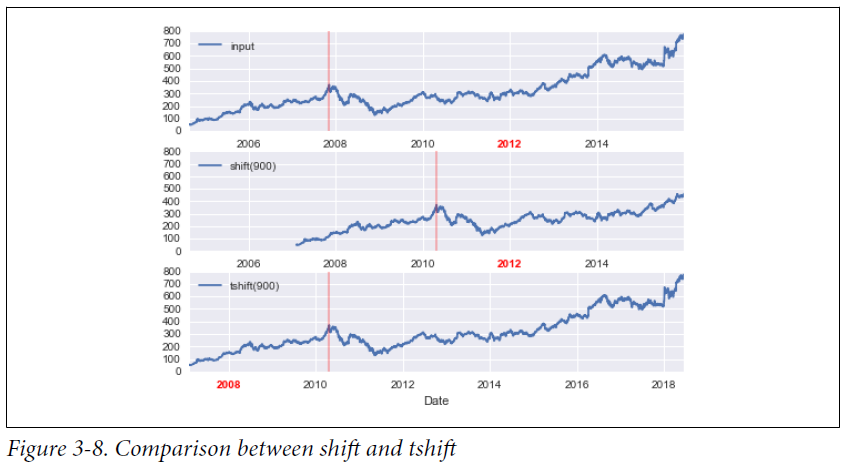

Performance - eval() and query()

In [213]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [214]:
%timeit df1 + df2 + df3 + df4

651 ms ± 75.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [215]:
%timeit pd.eval('df1 + df2 + df3 + df4')

330 ms ± 51.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [216]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

In [217]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

A         B         C
0  0.615875  0.525167  0.047354
1  0.330858  0.412879  0.441564
2  0.689047  0.559068  0.230350
3  0.290486  0.695479  0.852587
4  0.424280  0.534344  0.245216

In [218]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [219]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [220]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

A         B         C          D
0  0.615875  0.525167  0.047354  24.095868
1  0.330858  0.412879  0.441564   1.684325
2  0.689047  0.559068  0.230350   5.418335
3  0.290486  0.695479  0.852587   1.156439
4  0.424280  0.534344  0.245216   3.909296

In [222]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

In [224]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [225]:
# In addition to being a more efficient computation, compared to the masking expression
# this is much easier to read and understand.
result2 = df.query('A < 0.5 and B < 0.5') # 
np.allclose(result1, result2)

True

In [226]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True